# Clustering
### Setup

Importar liberias

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Introduction – Classification _vs_ Clustering

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Saving figure classification_vs_clustering_plot


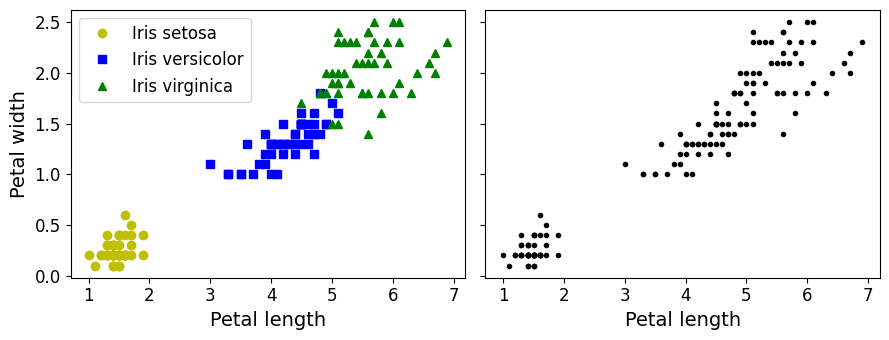

In [5]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show();

In [6]:
from sklearn.cluster import KMeans
k = 3
# KMeans generará n_clusters (3 en este caso) de grupos de datos
# intentanto agrupar los puntos más próximos partiendo de unos centroides
# Más adelante entreremos en detalle
kmeans = KMeans(n_clusters=k, random_state=101)
'''
fit para encontrar los centroides y clasificar los datos
predict para predecir sobre los datos ya etiquetados. sta info tb en labels_
El transform es para que me de las distancias de cada punto a todos los clusters (se usa luego)
'''
y_pred = kmeans.fit_predict(X[:, 2:])
kmeans_2 = KMeans(n_clusters=k, random_state=101)
kmeans_2.fit(X[:, 2:])
y_pred_2 = kmeans_2.predict(X[:, 2:])
print(sum(y_pred == y_pred_2))
# Los 0s del kmeans en realidad son los 1s del dataset y viceversa

#y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

150


In [7]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
mapping = np.array([1, 0, 2])



In [11]:
y_pred_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

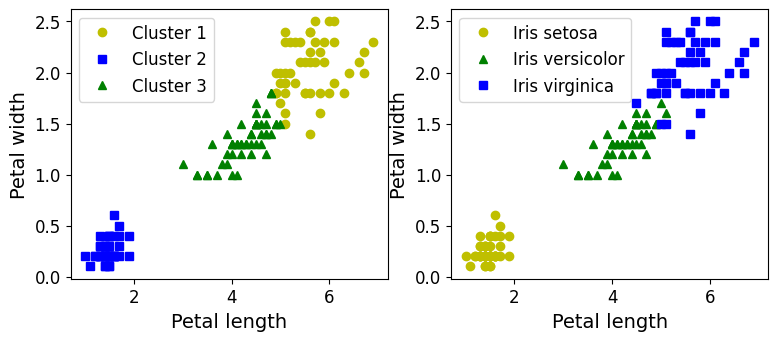

In [12]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)

plt.subplot(122)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "g^", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "bs", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.show()

In [13]:
# Métricas clásicas de clasificación
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix
accuracy_score(y_pred, data.target)

0.96

In [15]:
multilabel_confusion_matrix(data.target, y_pred)

array([[[100,   0],
        [  0,  50]],

       [[ 96,   4],
        [  2,  48]],

       [[ 98,   2],
        [  4,  46]]], dtype=int64)

In [16]:
classification_report(data.target, y_pred, output_dict=True, target_names=data.target_names)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 50.0},
 'versicolor': {'precision': 0.9230769230769231,
  'recall': 0.96,
  'f1-score': 0.9411764705882353,
  'support': 50.0},
 'virginica': {'precision': 0.9583333333333334,
  'recall': 0.92,
  'f1-score': 0.9387755102040817,
  'support': 50.0},
 'accuracy': 0.96,
 'macro avg': {'precision': 0.9604700854700855,
  'recall': 0.96,
  'f1-score': 0.9599839935974389,
  'support': 150.0},
 'weighted avg': {'precision': 0.9604700854700855,
  'recall': 0.96,
  'f1-score': 0.9599839935974391,
  'support': 150.0}}

In [17]:
import pandas as pd
centros = pd.DataFrame(kmeans.cluster_centers_, columns=data['feature_names'][2:])
centros

,petal length (cm),petal width (cm)
0,5.595833,2.037500
1,1.462000,0.246000
2,4.269231,1.342308


C:\Users\Jonatan\AppData\Local\Temp\ipykernel_15124\1146109200.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(centros.iloc[0][0], centros.iloc[0][1], "rx", label="Centro 1")
C:\Users\Jonatan\AppData\Local\Temp\ipykernel_15124\1146109200.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(centros.iloc[1][0], centros.iloc[1][1], "rx", label="Centro 2")
C:\Users\Jonatan\AppData\Local\Temp\ipykernel_15124\1146109200.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior)

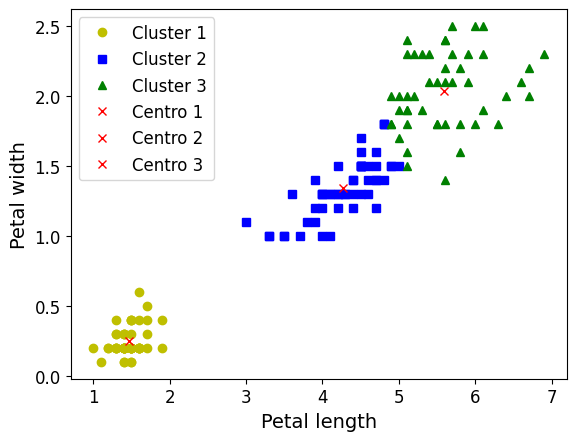

In [18]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.plot(centros.iloc[0][0], centros.iloc[0][1], "rx", label="Centro 1")
plt.plot(centros.iloc[1][0], centros.iloc[1][1], "rx", label="Centro 2")
plt.plot(centros.iloc[2][0], centros.iloc[2][1], "rx", label="Centro 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [19]:
import numpy as np
# Revisar ejemplo mal clasificado
#np.linalg.norm()
dt = pd.DataFrame(X[:,2:], columns=["petal_length", "petal_width"])
dt.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [20]:
tri = dt[(dt["petal_width"]<=1.5) & (dt["petal_length"]>=5)]
tri

,petal_length,petal_width
119,5.0,1.5
133,5.1,1.5
134,5.6,1.4


In [21]:
centros

,petal length (cm),petal width (cm)
0,5.595833,2.037500
1,1.462000,0.246000
2,4.269231,1.342308


In [22]:
list_dist = []
for index, row in tri.iterrows():
    list_dist.append(centros.apply(lambda x: np.linalg.norm(row.values-x.values), axis=1))

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_15124\959383710.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(centros.iloc[0][0], centros.iloc[0][1], "rx", label="Centro 1")
C:\Users\Jonatan\AppData\Local\Temp\ipykernel_15124\959383710.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(centros.iloc[1][0], centros.iloc[1][1], "rx", label="Centro 2")
C:\Users\Jonatan\AppData\Local\Temp\ipykernel_15124\959383710.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). T

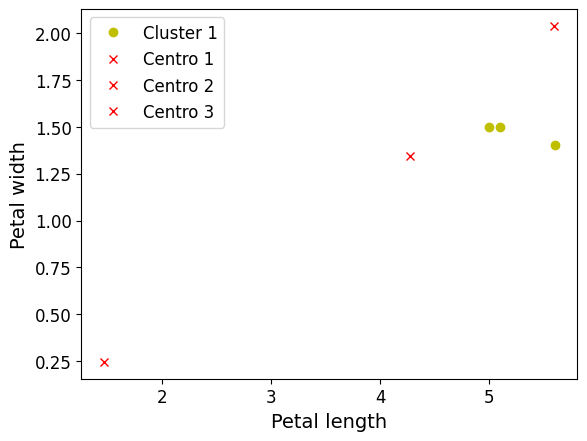

In [23]:
plt.plot(tri["petal_length"], tri["petal_width"], "yo", label="Cluster 1")
plt.plot(centros.iloc[0][0], centros.iloc[0][1], "rx", label="Centro 1")
plt.plot(centros.iloc[1][0], centros.iloc[1][1], "rx", label="Centro 2")
plt.plot(centros.iloc[2][0], centros.iloc[2][1], "rx", label="Centro 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [24]:
list_dist

[0    0.802449
 1    3.753660
 2    0.747590
 dtype: float64,
 0    0.731271
 1    3.848059
 2    0.845603
 dtype: float64,
 0    0.637514
 1    4.295900
 2    1.332019
 dtype: float64]

In [25]:
pd.DataFrame(list_dist)
#np.linalg.norm()

,0,1,2
0,0.802449,3.753660,0.747590
1,0.731271,3.848059,0.845603
2,0.637514,4.295900,1.332019


In [26]:
kmeans.predict(tri)

c:\Users\Jonatan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([2, 0, 0])

## K-Means

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Let's start by generating some blobs:

In [27]:
from sklearn.datasets import make_blobs

In [28]:
'''
Defino los centroides de mis datos sinteticos y su dispersion
Es simplemente para crear la muestra de datos
'''
blob_centroides = np.array([[0.2, 2.3],
                            [-1.5, 2.3],
                            [-2.8, 1.8],
                            [-2.8,2.8],
                            [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [29]:
X, y = make_blobs(n_samples = 2000,
                  centers = blob_centroides,
                  cluster_std = blob_std,
                  random_state = 7)


Now let's plot them:

In [30]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


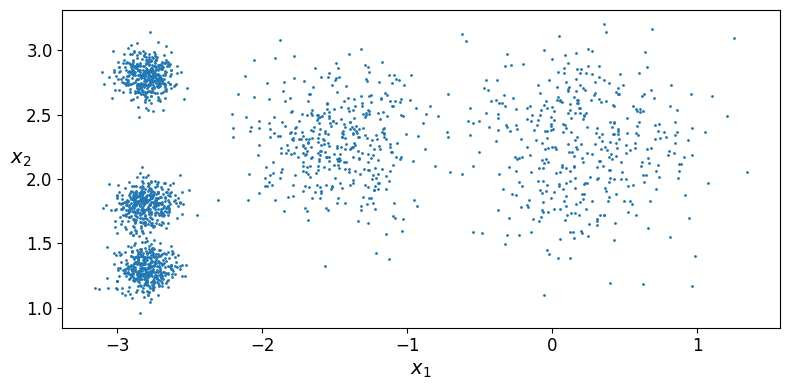

In [31]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

### Fit and Predict

Let's train a K-Means clusterer on this dataset. It will try to find each blob's center and assign each instance to the closest blob:

In [32]:
from sklearn.cluster import KMeans

In [33]:
# Comprobamos como el KMeans divide en clusters
k = 5
kmeans = KMeans(n_clusters = k,
                random_state =  42)

y_pred = kmeans.fit_predict(X)
y_pred

# en dos pasos:
# kmeans.fit(X)
# y_pred = kmeans.predict(X)

array([2, 2, 4, ..., 1, 4, 2])

In [34]:
kmeans.predict([[-2,3]])

array([1])

In [35]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [36]:
for c in kmeans.cluster_centers_:
    print(np.linalg.norm(c-[-2,3]))

2.1307588706675933
0.8186231784863393
1.6556614560812541
0.8880450995657563
2.539023574022769


Each instance was assigned to one of the 5 clusters:

In [37]:
print(y_pred)
print(y_pred is kmeans.labels_)

[2 2 4 ... 1 4 2]
True


In [38]:
len(X)

2000

In [39]:
len(kmeans.labels_)

2000

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [40]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

Note that the `KMeans` instance preserves the labels of the instances it was trained on.
In this context, the _label_ of an instance is the index of the cluster that instance gets assigned to:

In [41]:
'''
Esta etiqueta es el indice del cluster. Sirve para relacionarlo con
kmeans.cluster_centers_. El primer centroide corresponde a la etiqueta 0
'''
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2])

Of course, we can predict the labels of new instances:

In [42]:
X_new = np.array([[0,2],
                  [3,2],
                  [-3,3],
                  [-3,2.5]])

kmeans.predict(X_new)

array([0, 4, 1, 1])

In [43]:
centros = pd.DataFrame(kmeans.cluster_centers_)

Saving figure blobs_plot


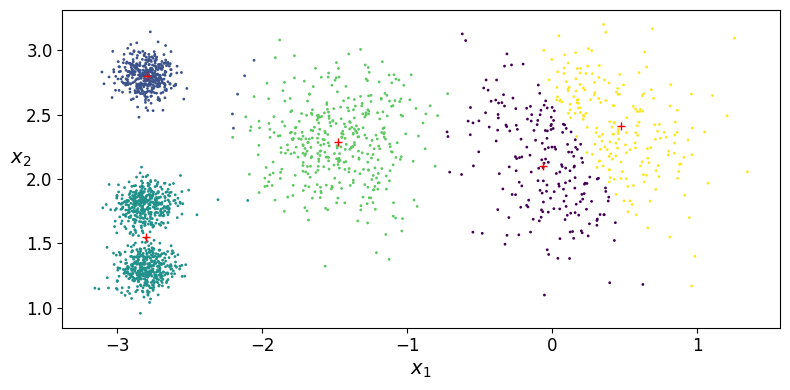

In [44]:
plt.figure(figsize=(8, 4))
plot_clusters(X, y = kmeans.predict(X)) # y realmente es el color, no el eje y
for x in range(len(centros)):
    plt.plot(centros.iloc[x][0], centros.iloc[x][1], "r+")
save_fig("blobs_plot")
plt.show()

In [45]:
# Pintar centroides

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

In [46]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=15, linewidths=20,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


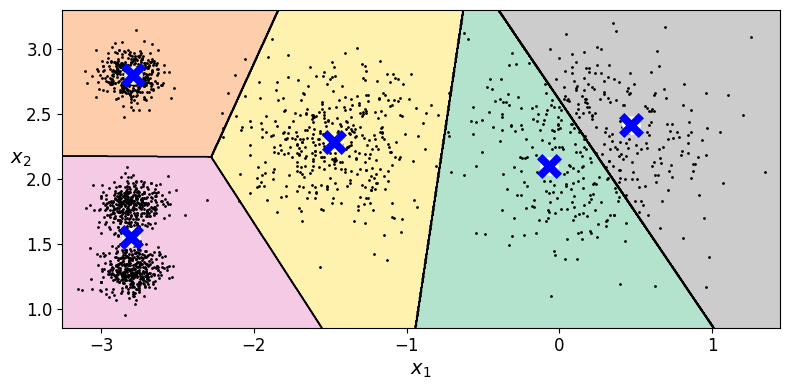

In [47]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

### Hard Clustering _vs_ Soft Clustering

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

In [48]:
'''
Como hard voting vs soft voting en los ensembles
'''
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

In [49]:
'''
La distancia de cada punto a predecir de cada cluster. Puede ser una buena manera
de reducir el dataset a k dimensiones.
'''
kmeans.transform(X_new).T

array([[0.12347236, 3.06863967, 3.06697984, 2.95975563],
       [2.9042344 , 5.84739223, 0.29040966, 0.36159148],
       [2.83778629, 5.81943941, 1.4618254 , 0.96879317],
       [1.50178217, 4.48368889, 1.685008  , 1.54053323],
       [0.62652832, 2.56319474, 3.51958769, 3.47149865]])

In [50]:
for c in kmeans.cluster_centers_:
    print(np.linalg.norm([0,2]-c))

0.12347236237764879
2.904234396532138
2.8377862856970264
1.5017821722234428
0.6265283219498149


In [51]:
# El predict simplemente me da el label del cluster más cercano
kmeans.predict(X_new)

array([0, 4, 1, 1])

You can verify that this is indeed the Euclidian distance between each instance and each centroid:

In [52]:
'''
np.tile y el reshape repite X_new 4 veces, para calcular mejor los puntos vs los centros. Luego se calcula la norma,
que es la distancia euclídea
'''
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.12347236, 2.9042344 , 2.83778629, 1.50178217, 0.62652832],
       [3.06863967, 5.84739223, 5.81943941, 4.48368889, 2.56319474],
       [3.06697984, 0.29040966, 1.4618254 , 1.685008  , 3.51958769],
       [2.95975563, 0.36159148, 0.96879317, 1.54053323, 3.47149865]])

### K-Means Algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. 

To get the original K-Means algorithm (for educational purposes only), you must set `init="random"`, `n_init=1`and `algorithm="lloyd"`.

 These hyperparameters will be explained below.

Let's run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [53]:
'''
init: varias maneras de inicializar los clusters, por defecto una más eficiente que random
n_init: numero de veces que correrá el algoritmo (diferentes centroides) hasta encontrar una que converja.
        la mejor ejecución se mide con la intertia
algorithm: varias maneras para que converja el algoritmo
max_iter: numero de veces que recalculará centroides para la convergencia
'''
kmeans_iter1 = KMeans(n_clusters = 5, 
                      init = 'random', 
                      n_init = 1, 
                      algorithm = 'lloyd', 
                      max_iter = 1, 
                      random_state = 99)


kmeans_iter2 = KMeans(n_clusters = 5, 
                      init = 'random', 
                      n_init = 1, 
                      algorithm = 'lloyd', 
                      max_iter = 2, 
                      random_state = 99)


kmeans_iter3 = KMeans(n_clusters = 5, 
                      init = 'random', 
                      n_init = 1, 
                      algorithm = 'lloyd', 
                      max_iter = 3, 
                      random_state = 99)


kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=99)

And let's plot this:

Saving figure kmeans_algorithm_plot


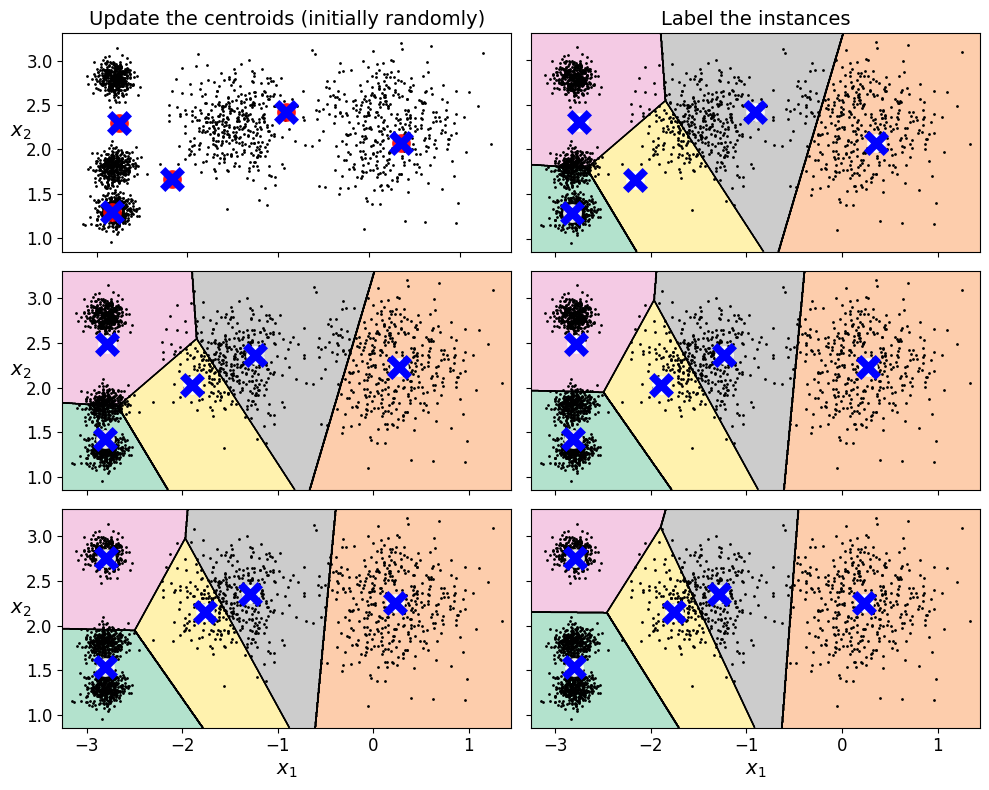

In [54]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='b')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

In [55]:
# Reconstruir última iteración
'''
init: varias maneras de inicializar los clusters, por defecto una más eficiente que random
n_init: numero de veces que correrá el algoritmo (diferentes centroides) hasta encontrar una que converja.
        la mejor ejecución se mide con la intertia
algorithm: varias maneras para que converja el algoritmo
max_iter: numero de veces que recalculará centroides para la convergencia
'''
kmeans_iter1 = KMeans(n_clusters = 5, 
                      init = 'random', 
                      n_init = 1, 
                      algorithm = 'lloyd', 
                      max_iter = 1, 
                      random_state = 1)


kmeans_iter2 = KMeans(n_clusters = 5, 
                      init = 'random', 
                      n_init = 1, 
                      algorithm = 'lloyd', 
                      max_iter = 2, 
                      random_state = 1)


kmeans_iter3 = KMeans(n_clusters = 5, 
                      init = 'random', 
                      n_init = 1, 
                      algorithm = 'lloyd', 
                      max_iter = 3, 
                      random_state = 1)


kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

Saving figure kmeans_algorithm_plot_2


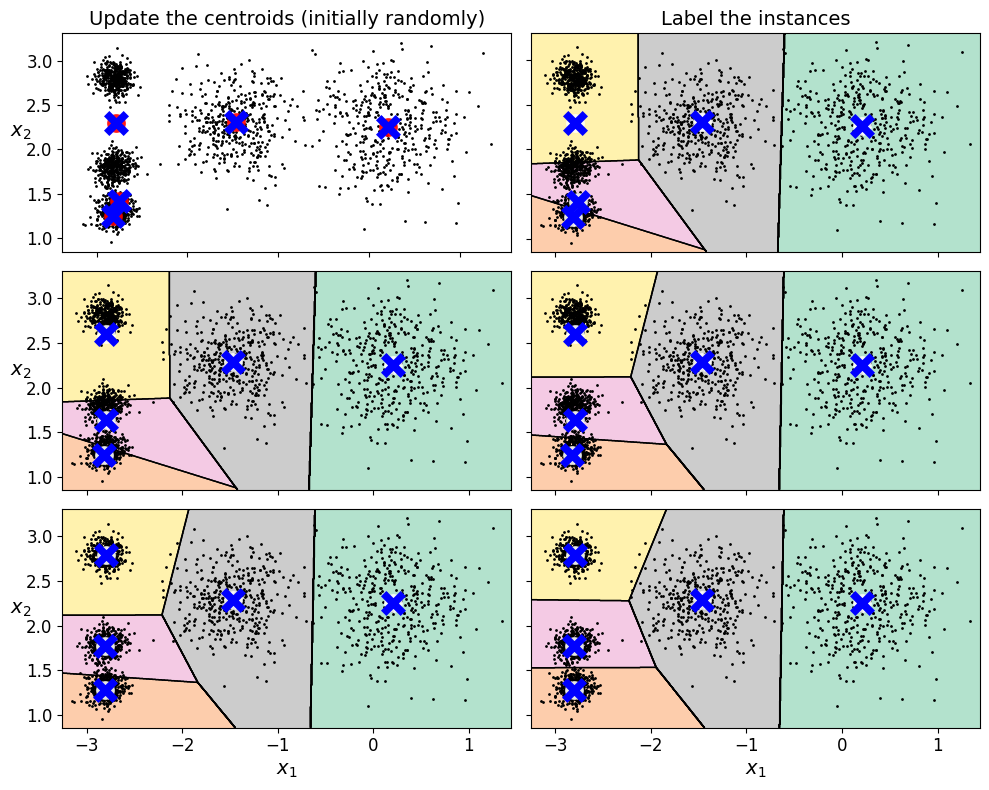

In [56]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='b')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot_2")
plt.show()

### K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [57]:
'''
Ejemplo de ejecucion de kmeans con dos semillas diferentes. Debido al inicio random, convergerá de manera diferente
Solucionamos con la inertia. Inicializamos varias veces, y el que tenga mejor inertia.
'''
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


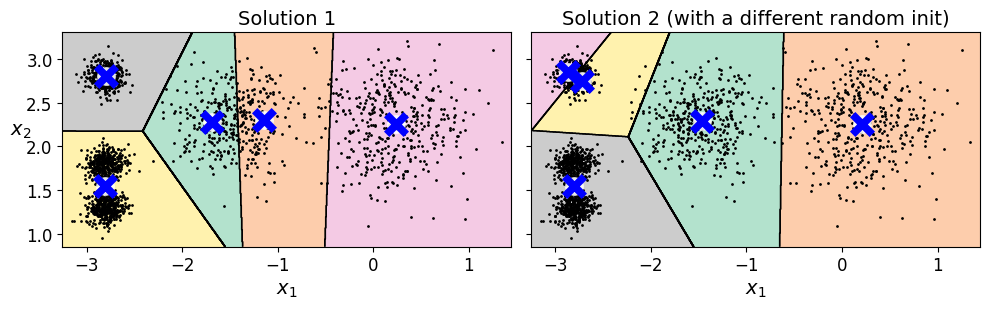

In [58]:
kmeans_rnd_init1 = KMeans(n_clusters = 5, init = 'random', n_init=1, algorithm = 'lloyd', random_state = 10)
kmeans_rnd_init2 = KMeans(n_clusters = 5, init = 'random', n_init=1, algorithm = 'lloyd', random_state = 141)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

In [59]:
'''
La suma de las distancias al cuadrado de cada punto a cada centroide
Cuanto más baja la inertia, más cerca están los puntos de los centroides y en teoria "mejor"
'''
kmeans_rnd_init1.inertia_

236.79848123759115

In [60]:
kmeans_rnd_init2.inertia_

258.64433132091153

As you can easily verify, inertia is the sum of the squared distances between each training instance and its closest centroid:

In [61]:
X_dist = kmeans_rnd_init2.transform(X)
sum(X_dist[np.arange(len(X_dist)), kmeans_rnd_init2.labels_]**2)

258.64433132091017

The `score()` method returns the negative inertia. Why negative? Well, it is because a predictor's `score()` method must always respect the "_great is better_" rule.

In [62]:
# Objetivo: minimizar la inertia
kmeans_rnd_init2.score(X)

-258.64433132091153

### Multiple Initializations

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. 

For example, here are the inertias of the two "bad" models shown in the previous figure:

In [63]:
kmeans_rnd_init1.inertia_

236.79848123759115

In [64]:
kmeans_rnd_init2.inertia_

258.64433132091153

As you can see, they have a higher inertia than the first "good" model we trained, which means they are probably worse.

When you set the `n_init` hyperparameter, Scikit-Learn runs the original algorithm `n_init` times, and selects the solution that minimizes the inertia. By default, Scikit-Learn sets `n_init=10`.

In [65]:
kmeans_rnd_10_init = KMeans(n_clusters = 5, init = 'random', n_init=100, algorithm = 'lloyd', random_state = 34)
kmeans_rnd_10_init.fit(X)

KMeans(init='random', n_clusters=5, n_init=100, random_state=34)

In [66]:
kmeans_rnd_10_init.inertia_

211.59853725816842

As you can see, we end up with the initial model, which is certainly the optimal K-Means solution (at least in terms of inertia, and assuming $k=5$).

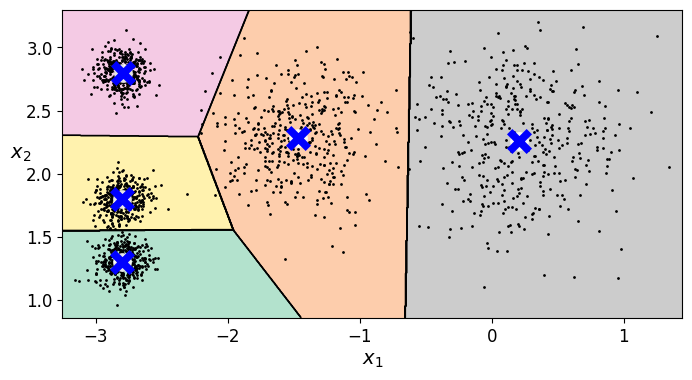

In [67]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_init, X)
plt.show()

### Finding the optimal number of clusters

What if the number of clusters was set to a lower or greater value than 5?

Saving figure bad_n_clusters_plot


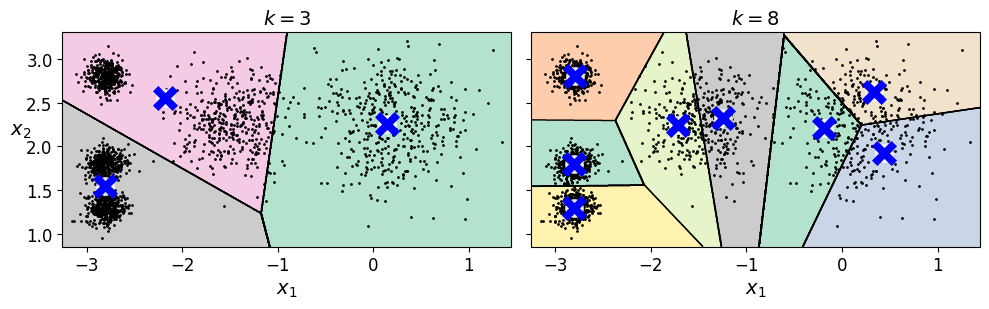

In [68]:
'''
Conseguir un modelo con la intertia baja, no quiere decir que sea el mejor.
Quiza otra cantidad de clusters sea mas apropiada
Cuantos mas k, menor es la intertia, pero ¿hasta cuando paramos k? -> Elbow
'''
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

Ouch, these two models don't look great. What about their inertias?

In [69]:
kmeans_k3.inertia_

653.2167190021553

In [70]:
kmeans_k8.inertia_

127.13141880461838

No, we cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

In [71]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


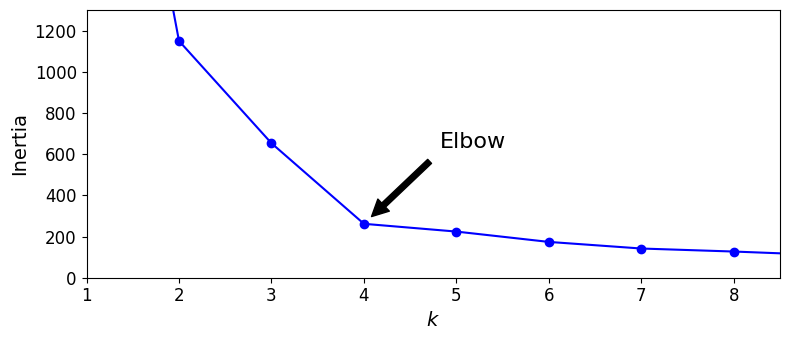

In [72]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

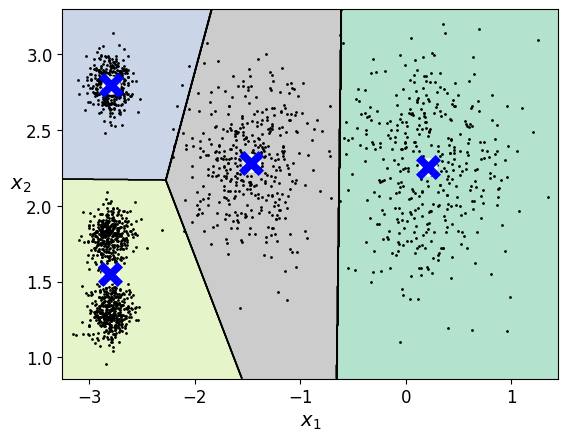

In [73]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Another approach is to look at the _silhouette score_, which is the mean _silhouette coefficient_ over all the instances. 

An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster).

**The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.**

Let's plot the silhouette score as a function of $k$:

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
silhouette_score(X, kmeans.labels_)

0.6267891051050735

In [76]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


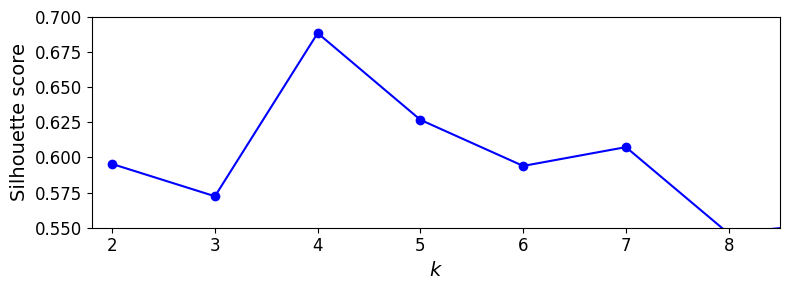

In [77]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

As you can see, this visualization is much richer than the previous one: in particular, although it confirms that $k=4$ is a very good choice, but it also underlines the fact that $k=5$ is quite good as well.

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_:

Saving figure silhouette_analysis_plot


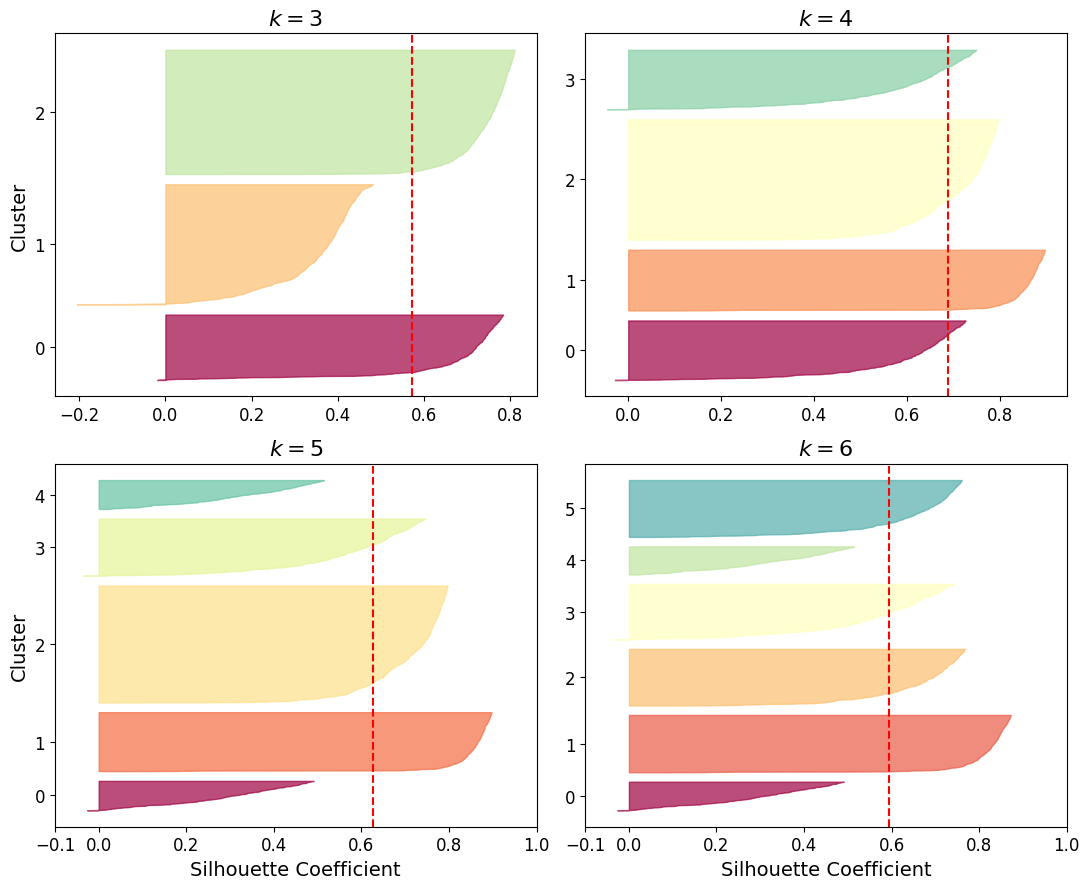

In [78]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

'''
La anchura de cada cuchillo representa el numero de muestras por cluster. Están ordenadas
por su coeficiente de silhouette, por eso tiene esa forma de cuchillo. Cuanta más caida tenga
indica que las muestras tienen un coeficiente más disperso en ese cluster
Deberian estar todos los clusters por encima de la media.
Hay algunas lineas hacia la izda xq es el coeficiente negativo. Puntos asignados al cluster erroneo.
'''
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

### Limits of K-Means

In [79]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

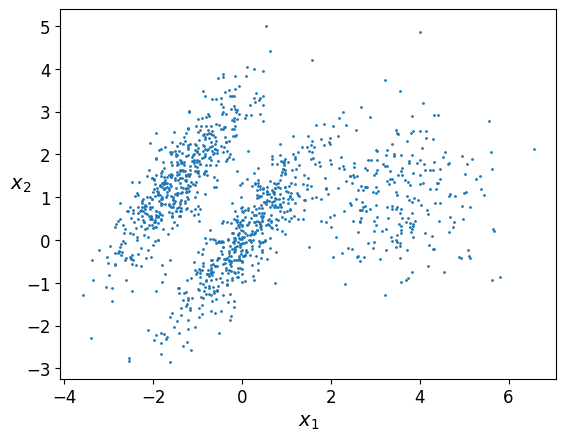

In [80]:
'''
Con algunas formas de clusters no se comporta muy bien el kmeans. En
este ejemplo, mejores clasificaciones provoca peores inertias.
'''
plot_clusters(X)

In [84]:
kmeans_good = KMeans(n_clusters = 3, 
                     init = np.array([[-1.5, 2.5], [0.5,0], [4,0]]), 
                     n_init = 1, 
                     random_state = 42)

kmeans_bad = KMeans(n_clusters = 3, random_state = 0)   

kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=0)

Saving figure bad_kmeans_plot


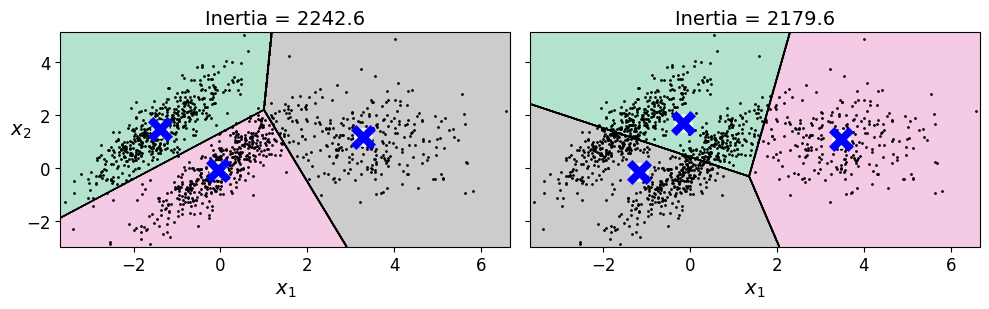

In [85]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

In [83]:
ss

NameError: name 'ss' is not defined

## DBSCAN

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [86]:
from sklearn.datasets import make_moons

In [87]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [88]:
from sklearn.cluster import DBSCAN

In [95]:
'''
Empieza con un punto aleatorio y segun va montando un cluster, busca en los puntos vecinos
eps: (epsilon) distancia sobre la que busca vecinos
min_samples: minimo numero de vecinos para considerarse cluster
'''
dbscan = DBSCAN(eps=0.05,
                min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [96]:
# El algoritmo
print(dbscan)

# Todos los datos etiquetados
print(len(dbscan.labels_))

# Los 10 primeros labels
print(dbscan.labels_[:10])

# Cuantos clusters ha montado
print(np.unique(dbscan.labels_))

DBSCAN(eps=0.05)
1000
[ 0  2 -1 -1  1  0  0  0  2  5]
[-1  0  1  2  3  4  5  6]


In [ ]:
# ¿Cuántos puntos por cluster?

In [ ]:
?dbscan

Type:        DBSCAN
String form: DBSCAN(eps=0.05)
File:        c:\users\jonatan\appdata\local\programs\python\python312\lib\site-packages\sklearn\cluster\_dbscan.py
Docstring:  
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
occur when the `eps` param is large and `min_samples` is low.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
    important DBSCAN parameter to choose appropriately for your data set
    and distance function.

min_samples : int, defaul

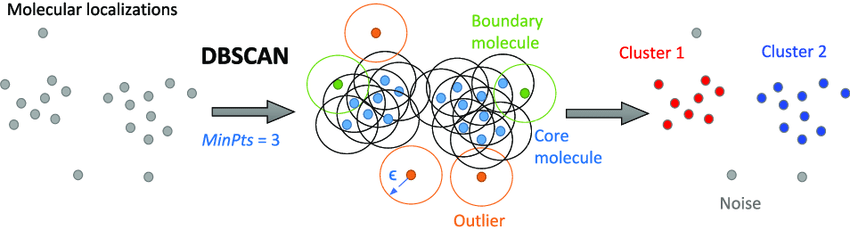

In [91]:
# Cuantos core_sample_indices_
# Aquellos localizados en áreas de gran densidad de puntos
print(len(dbscan.core_sample_indices_))

# Los indices de los 10 primeros core_sample
print(dbscan.core_sample_indices_[:10])

# La posicion (coordenadas) de los 5 primeros core_sample
print(dbscan.components_[:5])

808
[ 0  4  5  6  7  8 10 11 12 13]
[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]]


In [107]:
# Aumentemos epsilon para que tenga mayor rango y se formen menos clusters
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [108]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


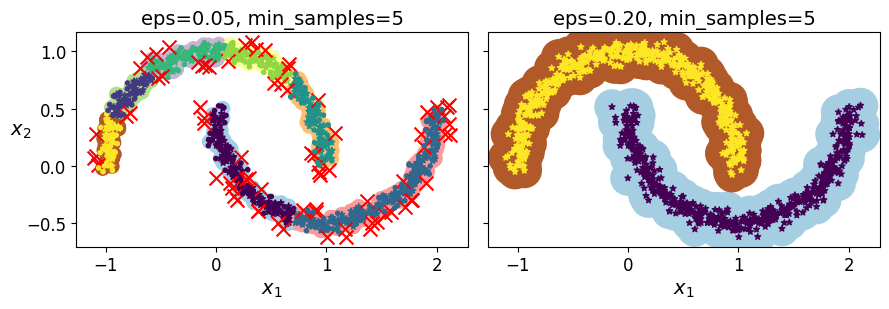

In [109]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()


In [110]:
# Utilizamos dbscan
dbscan = dbscan2

#### DBSCAN predictions

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
'''
No tiene .predict. Ya están los datos etiquetados y se le deja al usuario predecir con
el algoritmo de clasificacion que prefiera. Por ejemplo, KNN.
'''
knn = KNeighborsClassifier(n_neighbors=51)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=51)

In [114]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [ 0.97670045, -0.45832306],
       [ 0.90405882, -0.37651952],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [115]:
dbscan.labels_[dbscan.core_sample_indices_]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [116]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [117]:
knn.predict_proba(X_new)

array([[0.17647059, 0.82352941],
       [1.        , 0.        ],
       [0.1372549 , 0.8627451 ],
       [1.        , 0.        ]])

In [122]:
0.1372549*51 +  0.8627451 *51

51.0

Saving figure cluster_classification_plot


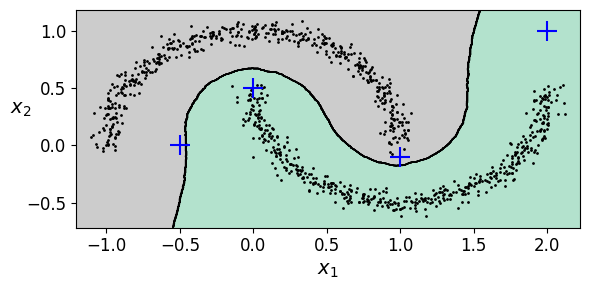

In [123]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
# ¿Qué es 0.2?
y_pred[y_dist > 0.2] = -1
# ¿Qué hace ravel?
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

array([-1,  0,  1, -1], dtype=int64)